In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv("customer_purchase_data.csv")
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [4]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


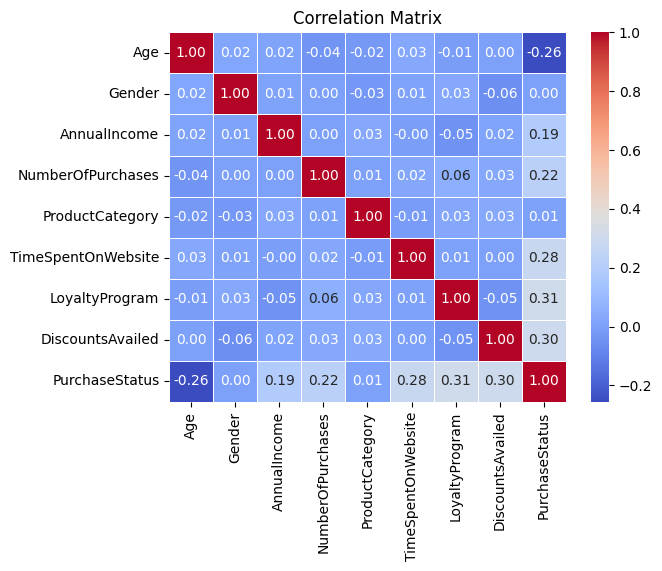

In [5]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

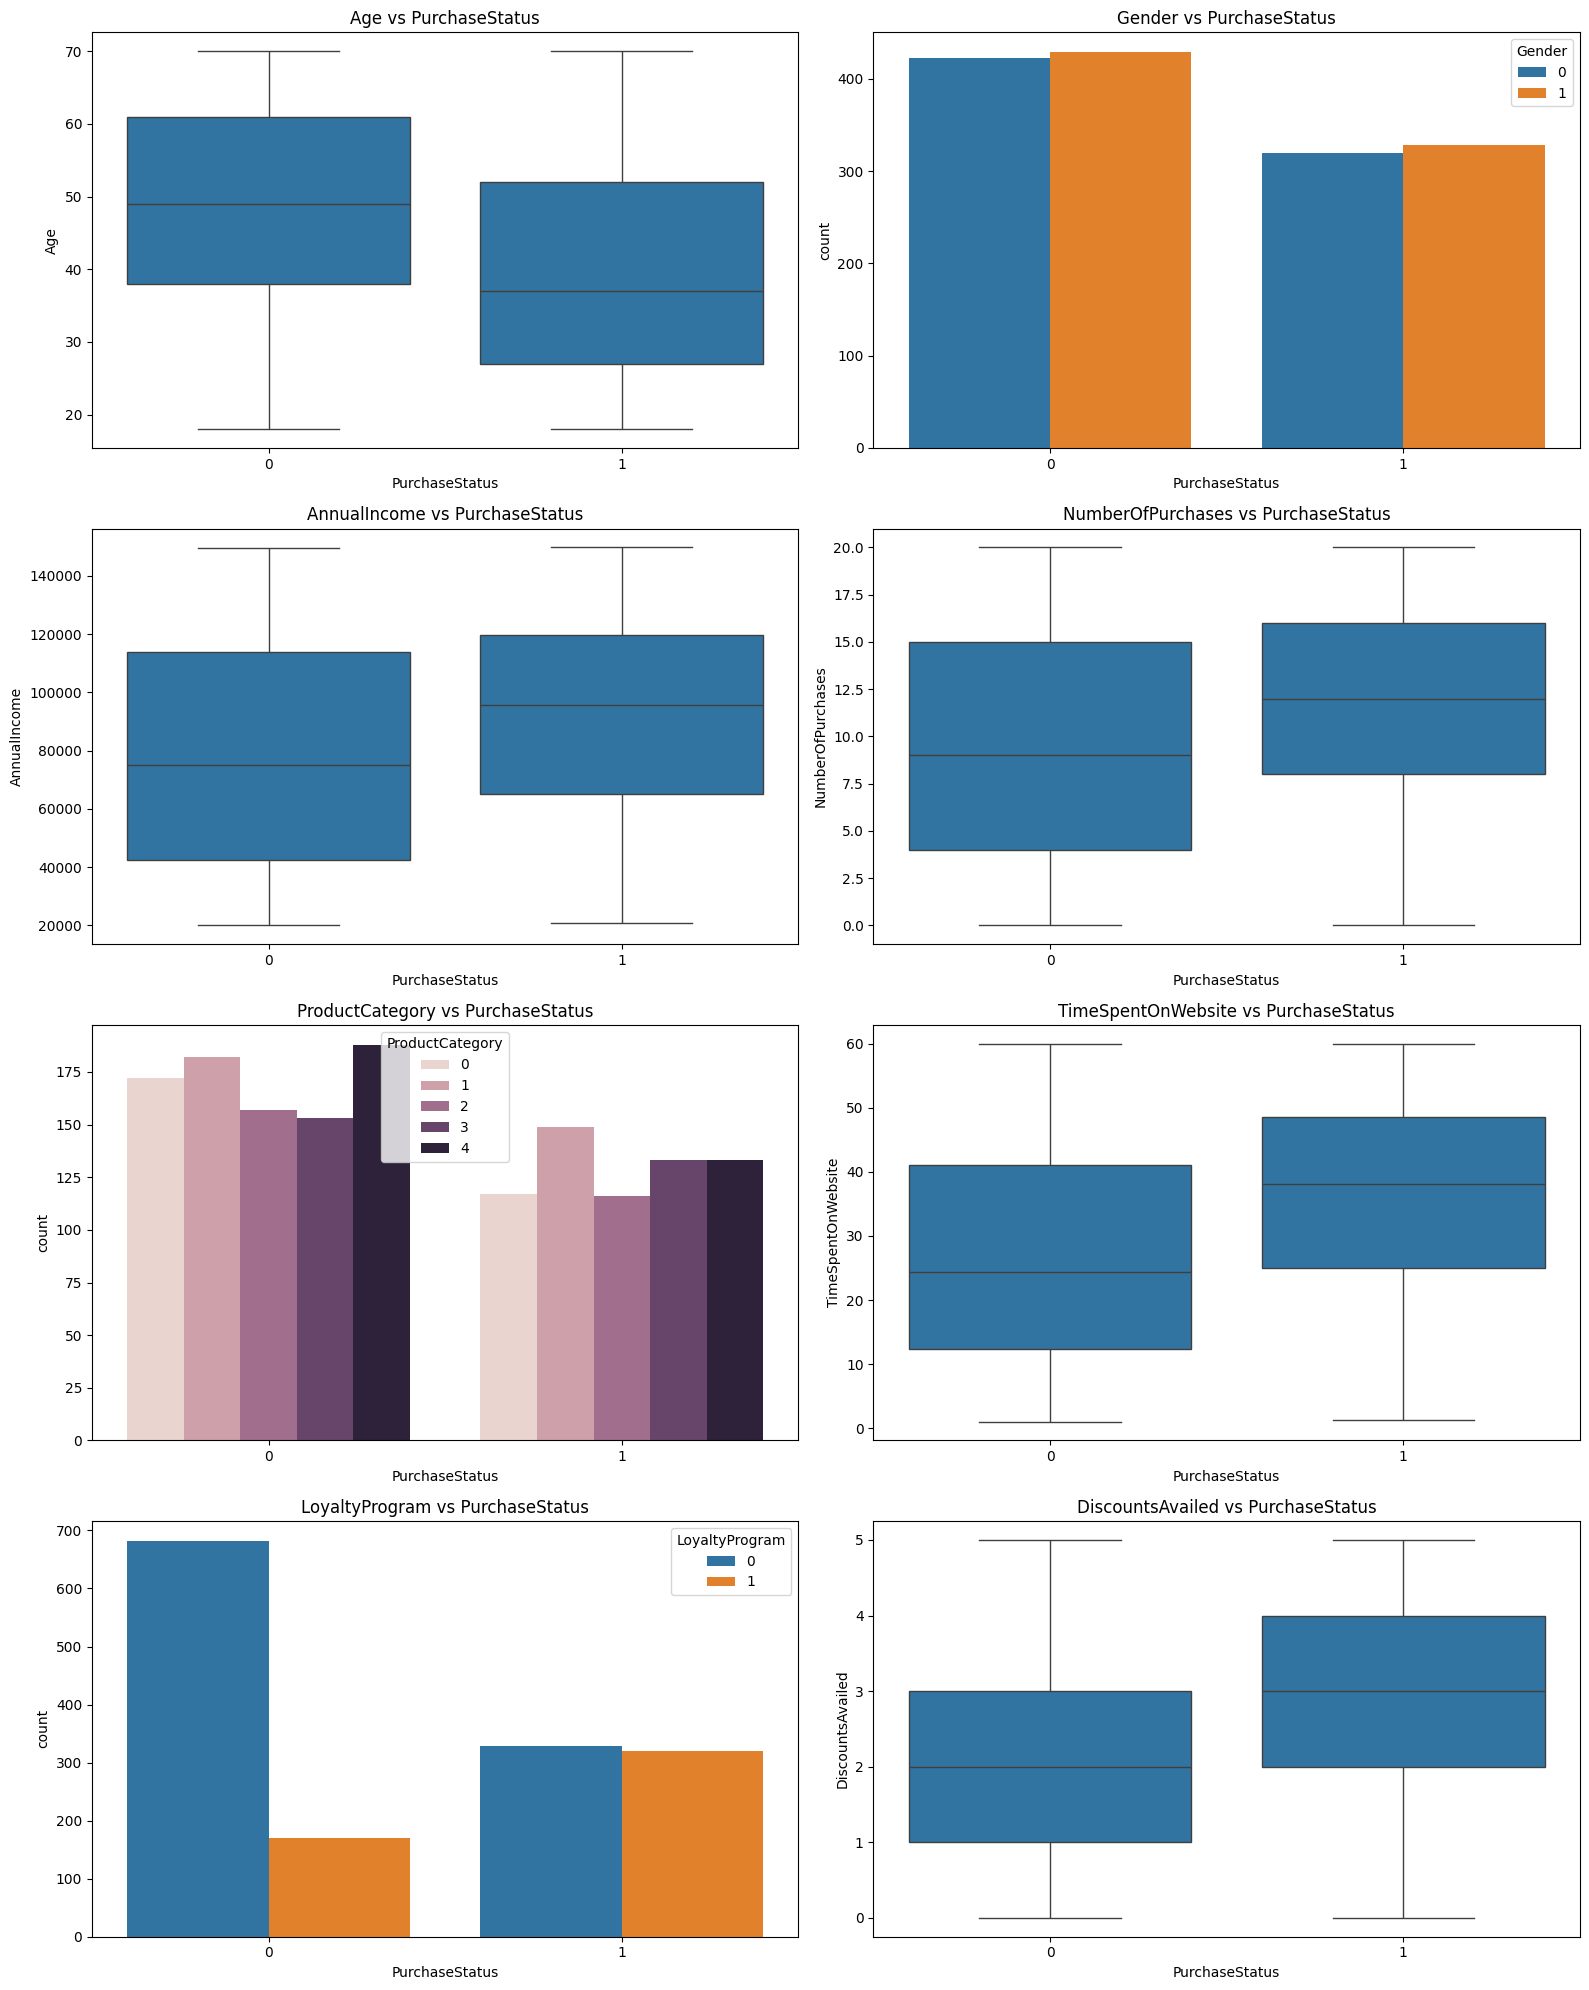

In [6]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# Age vs PurchaseStatus
sns.boxplot(x='PurchaseStatus', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs PurchaseStatus')

# Gender vs PurchaseStatus
sns.countplot(x='PurchaseStatus', hue='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Gender vs PurchaseStatus')

# AnnualIncome vs PurchaseStatus
sns.boxplot(x='PurchaseStatus', y='AnnualIncome', data=df, ax=axes[1, 0])
axes[1, 0].set_title('AnnualIncome vs PurchaseStatus')

# NumberOfPurchases vs PurchaseStatus
sns.boxplot(x='PurchaseStatus', y='NumberOfPurchases', data=df, ax=axes[1, 1])
axes[1, 1].set_title('NumberOfPurchases vs PurchaseStatus')

# ProductCategory vs PurchaseStatus
sns.countplot(x='PurchaseStatus', hue='ProductCategory', data=df, ax=axes[2, 0])
axes[2, 0].set_title('ProductCategory vs PurchaseStatus')

# TimeSpentOnWebsite vs PurchaseStatus
sns.boxplot(x='PurchaseStatus', y='TimeSpentOnWebsite', data=df, ax=axes[2, 1])
axes[2, 1].set_title('TimeSpentOnWebsite vs PurchaseStatus')

# LoyaltyProgram vs PurchaseStatus
sns.countplot(x='PurchaseStatus', hue='LoyaltyProgram', data=df, ax=axes[3, 0])
axes[3, 0].set_title('LoyaltyProgram vs PurchaseStatus')

sns.boxplot(x='PurchaseStatus', y='DiscountsAvailed', data=df, ax=axes[3,1])
axes[3,1].set_title('DiscountsAvailed vs PurchaseStatus')

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# Split the data into features and target variable
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [8]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [12]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [14]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')

Random Forest:
 Accuracy: 0.9533333333333334
 Precision: 0.9913793103448276
 Recall: 0.8984375
 F1 Score: 0.9426229508196722
